In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Point, Polygon
import osmnx as ox
import pyproj
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
road = ox.graph_from_place('Manila, Philippines', network_type="drive")

In [3]:
prj_road = ox.project_graph(road, to_crs='epsg:4326')

In [17]:
prj_road

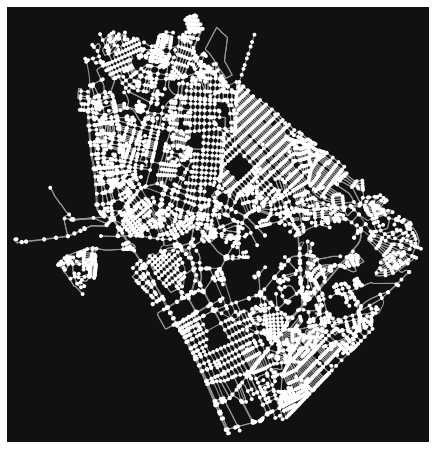

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [18]:
ox.plot.plot_graph(prj_road)

KeyError: 'Pedro Gil Street'

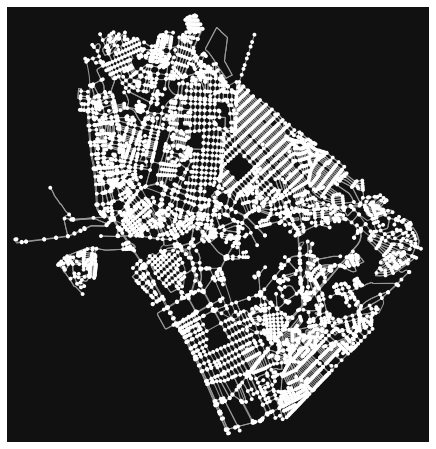

In [8]:
route=['Pedro Gil Street']

ox.plot.plot_graph_route(road, route)

In [7]:
ox.save_graph_shapefile(prj_road, filepath=r'C:\Users\albie\OneDrive\Desktop\Flood_NOAH\MetroManila')

C:\Users\albie\anaconda3\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [9]:
manila_roads = gpd.read_file(r'C:\Users\albie\OneDrive\Desktop\Flood_NOAH\MetroManila')

In [10]:
manila_roads.head(60)

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,reversed,length,from,to,ref,tunnel,width,access,bridge,junction,geometry
0,12067330,21590503,0,22738968,1,2,Pablo Ocampo Street,secondary,40,False,14.111,12067330,21590503,None,None,None,None,None,None,"LINESTRING (283125.890 1610579.475, 283112.317..."
1,12067330,6621954486,0,"[156307503, 675166366, 675166367]",1,"['3', '4']",Roxas Boulevard,trunk,60,False,243.826,12067330,6621954486,120,None,None,None,None,None,"LINESTRING (283125.890 1610579.475, 283121.015..."
2,12067330,243426945,0,4371996,1,2,Pablo Ocampo Street,secondary,40,False,29.060,243426945,12067330,None,None,None,None,None,None,"LINESTRING (283154.896 1610581.753, 283135.741..."
3,12067330,1685739477,0,657310232,1,3,Roxas Boulevard,trunk,60,False,13.047,1685739477,12067330,120,None,None,None,None,None,"LINESTRING (283130.677 1610567.392, 283125.890..."
4,21590503,1685739476,0,657310237,1,4,Roxas Boulevard,trunk,60,False,13.441,21590503,1685739476,120,None,None,None,None,None,"LINESTRING (283112.317 1610575.566, 283118.258..."
5,21590503,8289508348,0,"[707188485, 866818514, 688143045]",1,"['4', '5']",Roxas Boulevard,trunk,60,False,557.408,8289508348,21590503,120,None,None,None,None,None,"LINESTRING (282898.303 1611087.952, 282901.531..."
6,6621954486,6621936982,0,705040144,1,1,None,trunk_link,20,False,30.295,6621954486,6621936982,None,None,None,None,None,None,"LINESTRING (283031.125 1610803.111, 283059.366..."
7,6621954486,26032792,0,712297667,1,4,Roxas Boulevard,trunk,60,False,117.206,6621954486,26032792,120,None,None,None,None,None,"LINESTRING (283031.125 1610803.111, 282987.641..."
8,12067342,21590497,0,22739769,1,4,Padre Burgos Avenue,primary,60,False,24.866,12067342,21590497,150,None,None,None,None,None,"LINESTRING (281899.676 1613179.636, 281888.801..."
9,12067342,3403138097,0,1066266970,1,4,Bonifacio Drive,trunk,60,False,180.901,12067342,3403138097,120,None,None,None,None,None,"LINESTRING (281899.676 1613179.636, 281889.936..."


In [11]:
manila_roads.columns

Index(['u', 'v', 'key', 'osmid', 'oneway', 'lanes', 'name', 'highway',
       'maxspeed', 'reversed', 'length', 'from', 'to', 'ref', 'tunnel',
       'width', 'access', 'bridge', 'junction', 'geometry'],
      dtype='object')

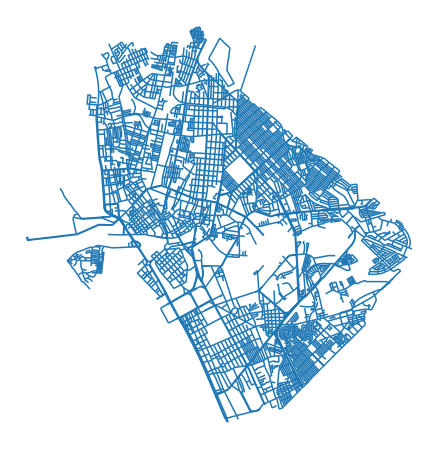

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
manila_roads.plot(ax=ax)
ax.axis('off')
plt.show()

In [13]:
import networkx as nx

In [14]:
graph = nx.Graph()
graph

In [19]:
# add multiple nodes
roads = filter(None, list(manila_roads['name']))
graph.add_nodes_from(roads)

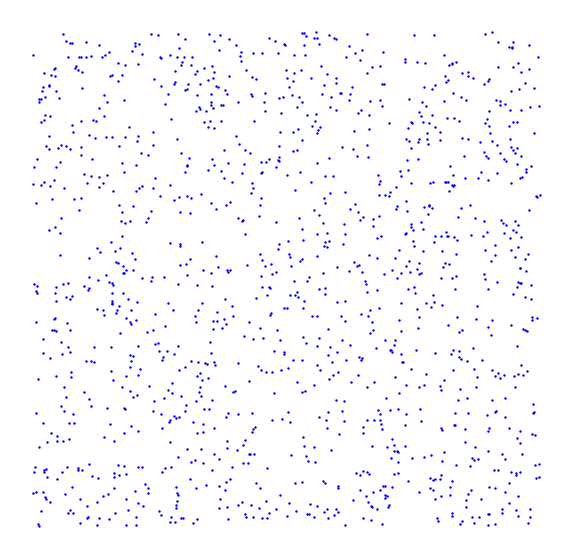

In [23]:
plt.figure(figsize=(10,10))
nx.draw_networkx(graph, pos = nx.random_layout(graph), 
                 with_labels=False, node_size=2, node_color='blue')
plt.axis('off')
plt.show()